In [ ]:
import numpy as np
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
# For visualizing the plottings better
%matplotlib inline
# For Data Visualization
import seaborn as sns

# Preprocessing modules
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# Metrics
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve
from sklearn.naive_bayes import GaussianNB

# Saving the model
import pickle




## to waarning ignore
import warnings
warnings.filterwarnings("ignore")#, category=DeprecationWarning)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
data = pd.read_csv('tes_copy.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
df = data.copy()
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698092 entries, 0 to 1698091
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 142.5+ MB


In [ ]:
df.isnull().sum()
df1=pd.DataFrame(df)
df1.dropna(subset=['newbalanceDest','isFlaggedFraud'],how='any',inplace=True)

In [ ]:
df1=pd.DataFrame(df)

In [ ]:
df1.dropna(subset=['newbalanceDest','isFlaggedFraud'],how='any',inplace=True)

In [ ]:
df1['isFraud'].value_counts()

0.0    1696281
1.0       1810
Name: isFraud, dtype: int64

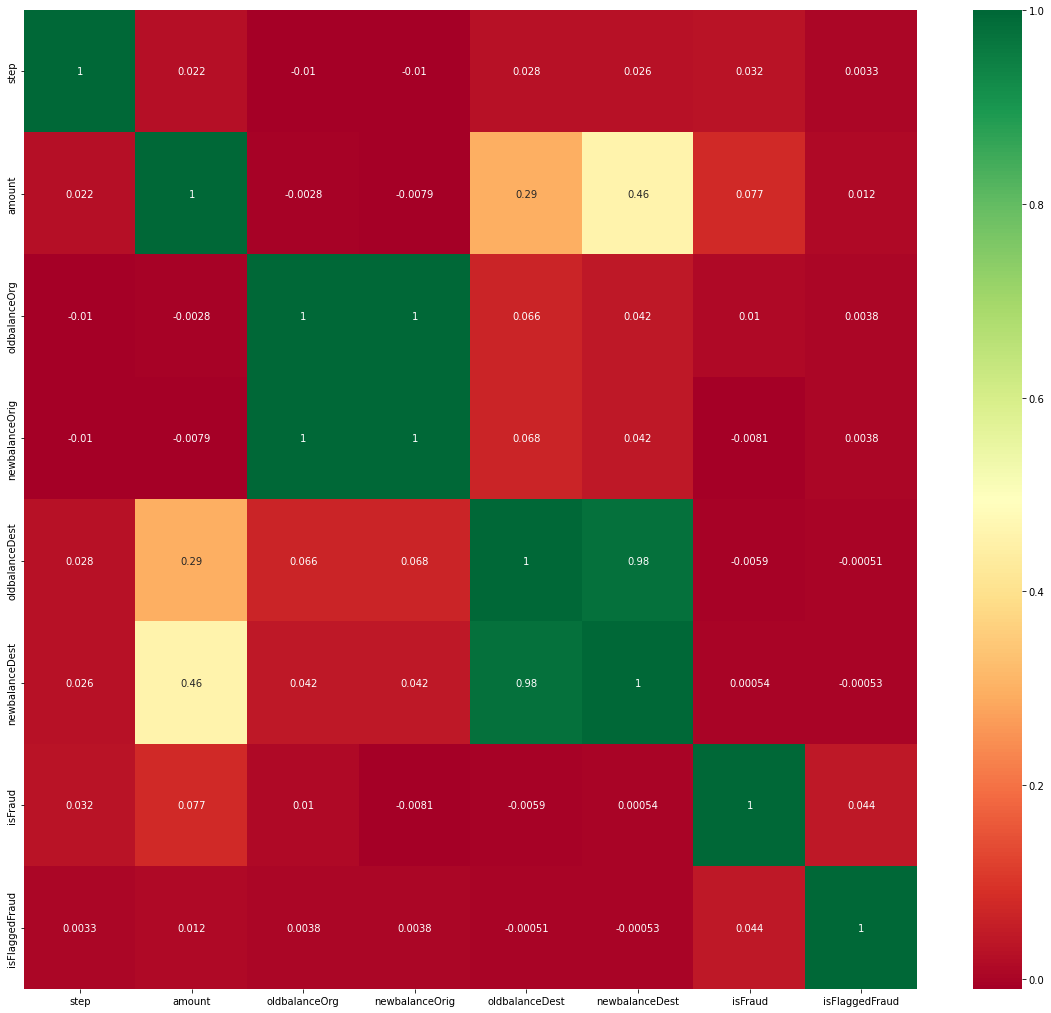

In [ ]:
corr = df1.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

In [ ]:
df1['type'].value_counts()
sns.countplot(df1['type'])
plt.show()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

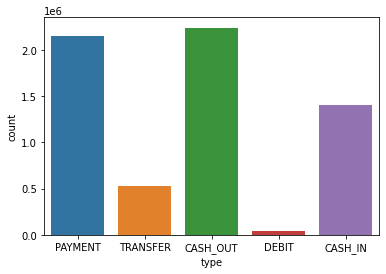

In [ ]:
sns.countplot(df1['type'])
plt.show()

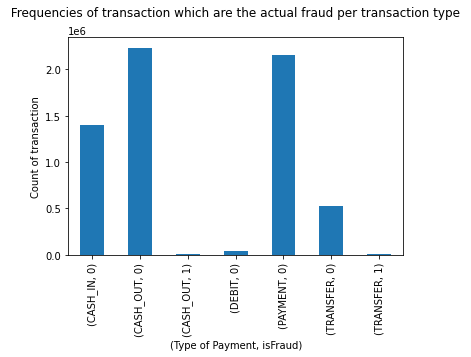

In [ ]:
fraud_type = df1.groupby(['type', 'isFraud']).size().plot(kind='bar')
fraud_type.set_title(" Frequencies of transaction which are the actual fraud per transaction type \n" )
fraud_type.set_xlabel("(Type of Payment, isFraud)")
fraud_type.set_ylabel("Count of transaction")

plt.show()

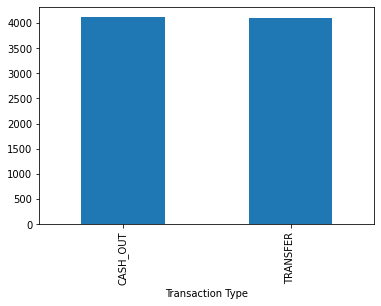

In [ ]:
fraud = df1['isFraud'].isin([1])

fraud_time = df1[fraud].groupby(['type']).size().plot(kind='bar')
fraud_time.set_xlabel("Transaction Type")

plt.show()

In [ ]:
print("Are there any mismatch in the balance at origin and destination after transaction?")

df1['origBalance_inacc'] = (df1["oldbalanceOrg"] - df1["amount"]!=df1['newbalanceOrig'] ).astype(int)
df1['destBalance_inacc'] = (df1["oldbalanceDest"] + df1["amount"] !=df1['newbalanceDest']).astype(int)

print("Balance Error(%) at the origin:",round(df1['origBalance_inacc'].value_counts()[1]/df1.shape[0] * 100,2))

print("Balance Error(%) at the destination:",round(df1['destBalance_inacc'].value_counts()[1]/df1.shape[0] * 100,2))

Are there any mismatch in the balance at origin and destination after transaction?
Balance Error(%) at the origin: 85.09
Balance Error(%) at the destination: 74.45


In [ ]:
print("Number of transactions with amount is less 0?")
print(len(df1[df1.amount<0]))

print("Number of transactions with amount is equal to 0?")
print(len(df1[df1.amount==0]))

Number of transactions with amount is less 0?
0
Number of transactions with amount is equal to 0?
16


In [ ]:
print("Number of transactions with amount is less 0?")
print(len(df[df.amount<0]))

print("Number of transactions with amount is equal to 0?")
print(len(df[df.amount==0]))

Number of transactions with amount is less 0?
0
Number of transactions with amount is equal to 0?
16


In [ ]:
print("What type of transactions are they?")
print(df[df.amount<=0]['type'].value_counts())

print("Are all these marked as Fraud Transactions?")
df[df.amount<=0]['isFraud'].value_counts()[1] == len(df[df.amount<=0])

What type of transactions are they?
CASH_OUT    16
Name: type, dtype: int64
Are all these marked as Fraud Transactions?


True

In [ ]:
df_temp = df[df.isFlaggedFraud==1]
print("How many frauds transactions are Flagged?:")
print("\t",len(df_temp))

print("What type of transactions are they?")
print("\t",df_temp['type'].value_counts().index[0])

print("Are all these flagged also marked as Fraud Transactions?")
print("\t",df_temp['isFraud'].value_counts()[1] == len(df_temp))

How many frauds transactions are Flagged?:
	 16
What type of transactions are they?
	 TRANSFER
Are all these flagged also marked as Fraud Transactions?
	 True


In [ ]:
df1['type']

0           PAYMENT
1           PAYMENT
2          TRANSFER
3          CASH_OUT
4           PAYMENT
             ...   
6362615    CASH_OUT
6362616    TRANSFER
6362617    CASH_OUT
6362618    TRANSFER
6362619    CASH_OUT
Name: type, Length: 6362620, dtype: object

In [ ]:
df1['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
type_map = {
    'PAYMENT':'OTHERS',
    'TRANSFER':'TRANSFER',
    'CASH_OUT':'CASH_OUT',
    'DEBIT':'OTHERS',
    'CASH_IN':'OTHERS'
}

In [ ]:
df1['type'] = df1['type'].map(type_map)

df1['type'].unique()

array(['OTHERS', 'TRANSFER', 'CASH_OUT'], dtype=object)

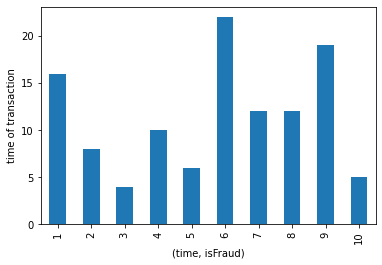

In [ ]:
fraud = df1['isFraud'].isin([1])

fraud_time = df1[fraud].groupby(['step']).size().plot(kind='bar')
fraud_time.set_xlabel("(time, isFraud)")
fraud_time.set_ylabel("time of transaction")
plt.show()

In [ ]:
# deleting the unnecessary varibles from input data

X = df1.drop(columns=['step', 'newbalanceDest','oldbalanceOrg','nameOrig','nameDest','isFlaggedFraud','isFraud'])

X.head()

,type,amount,newbalanceOrig,oldbalanceDest,origBalance_inacc,destBalance_inacc
0,OTHERS,9839.64,160296.36,0.0,0,1
1,OTHERS,1864.28,19384.72,0.0,0,1
2,TRANSFER,181.00,0.00,0.0,0,1
3,CASH_OUT,181.00,0.00,21182.0,0,1
4,OTHERS,11668.14,29885.86,0.0,0,1


In [ ]:
y = df1['isFraud']
y.head()

0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: isFraud, dtype: float64

In [ ]:
y.value_counts()

0.0    97110
1.0      114
Name: isFraud, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train['type']

28442    CASH_OUT
27756    CASH_OUT
48334    CASH_OUT
59632    CASH_OUT
42155      OTHERS
           ...   
6265       OTHERS
54886      OTHERS
76820    CASH_OUT
860      CASH_OUT
15795      OTHERS
Name: type, Length: 65140, dtype: object

In [ ]:
dummies_type = pd.get_dummies(X_train['type'], prefix='type', drop_first=True)
dummies_type

,type_OTHERS,type_TRANSFER
28442,0,0
27756,0,0
48334,0,0
59632,0,0
42155,1,0
...,...,...
6265,1,0
54886,1,0
76820,0,0
860,0,0


In [ ]:
X_train = pd.concat([X_train, dummies_type], axis=1)

In [ ]:
X_train.columns

Index(['type', 'amount', 'newbalanceOrig', 'oldbalanceDest',
       'origBalance_inacc', 'destBalance_inacc', 'type_OTHERS',
       'type_TRANSFER'],
      dtype='object')

In [ ]:
X_train = X_train.drop(columns=['type'])

In [ ]:
dummies_type = pd.get_dummies(X_test['type'], prefix='type', drop_first=True)

In [ ]:
X_test = pd.concat([X_test, dummies_type], axis=1)

In [ ]:
X_test.head()

,type,amount,newbalanceOrig,oldbalanceDest,origBalance_inacc,destBalance_inacc,type_OTHERS,type_TRANSFER
16183,OTHERS,3132.87,4065.13,0.00,0,1,1,0
13203,CASH_OUT,266237.57,0.00,522433.81,1,1,0,0
23515,CASH_OUT,41856.67,0.00,134569.78,1,1,0,0
80760,CASH_OUT,229417.47,1417638.36,28740.42,1,1,0,0
29719,OTHERS,4078.34,15496546.99,243703.88,1,1,1,0


In [ ]:
X_test = X_test.drop(columns=['type'])

In [ ]:
(X_train.columns == X_test.columns).all()

True

In [ ]:
X_test.columns

Index(['amount', 'newbalanceOrig', 'oldbalanceDest', 'origBalance_inacc',
       'destBalance_inacc', 'type_OTHERS', 'type_TRANSFER'],
      dtype='object')

In [ ]:
 rf = RandomForestClassifier(class_weight="balanced")
 rf_model = rf.fit(X_train, y_train)


In [ ]:
rf_model.score(X_test, y_test)

0.9999942848025757

In [ ]:
rf_params = {
    'n_estimators' : [50,100,130,150],
    'max_depth' : [4,5,1,2,None],
    'min_samples_split' : [2,3,4,5],
    'min_samples_leaf' : [1,4,10,20],
    'max_leaf_nodes' : [2,5,10,None]

}

In [ ]:
rf_rs = RandomizedSearchCV(rf, rf_params, cv=5, n_iter=5)

In [ ]:
rf_best_model = rf_rs.fit(X_train, y_train)

In [ ]:
rf_best_model.score(X_test, y_test)

0.9999823895008914

In [ ]:
rf_best_model.best_params_

{'max_depth': 5,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 130}

In [ ]:
rf_best_model.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=130)

In [ ]:
y_pred = rf_best_model.predict(X_test)


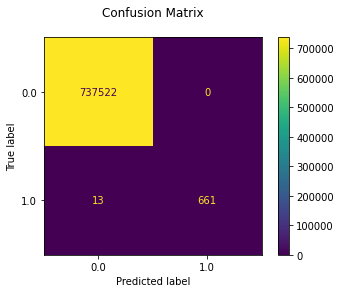

In [ ]:
plot_confusion_matrix(rf_best_model, X_test, y_test)
plt.title('Confusion Matrix\n')
plt.show()

In [ ]:
print("Classification Report:\n\n", classification_report(y_test, y_pred))

Classification Report:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    737522
         1.0       1.00      0.98      0.99       674

    accuracy                           1.00    738196
   macro avg       1.00      0.99      1.00    738196
weighted avg       1.00      1.00      1.00    738196



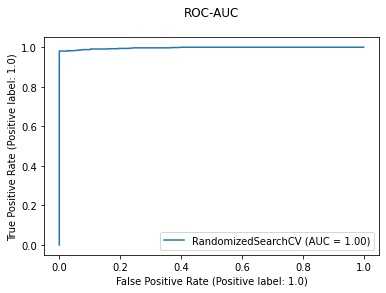

In [ ]:
plot_roc_curve(rf_best_model, X_test, y_test)
plt.title('ROC-AUC\n')
plt.show()

In [ ]:
pickle.dump(rf_rs,open("RFClassifier.pkl",'wb'))
loaded_model = pickle.load(open("RFClassifier.pkl",'rb'))
resulta= loaded_model.score(X_test,y_test)

In [ ]:
loaded_model = pickle.load(open("RFClassifier.pkl",'rb'))

In [ ]:
resulta= loaded_model.score(X_test,y_test)

In [ ]:
resulta

0.9999823895008914